# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

## 1 Carga de librerias, accesos y configuraciones.
___

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
sns.set_context("talk")

In [ ]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/1_Datasets
1.1_input_dataset.csv   1.3_clean_dataset.csv    1.5_encoding_dataset.csv
1.2_sample_dataset.csv  1.4_cluster_dataset.csv  1.6_pca_cluster_dataset.csv


In [ ]:
df = pd.read_csv('1.3_clean_dataset.csv', index_col=0)

___
___

## 2. Inspección
___

In [ ]:
df.head(10)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,4.42,352,244,2003
1,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,3.79,152,1,2005
2,0767910435,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,Broadway Books,3.88,256,131,2004
3,0618391002,The Lord of the Rings: Weapons and Warfare,Chris Smith,Houghton Mifflin Harcourt,4.53,218,45,2003
4,0618510826,The Lord of the Rings: Complete Visual Companion,Jude Fisher,Houghton Mifflin Harcourt,4.50,224,6,2004
5,097669400X,Agile Web Development with Rails: A Pragmatic ...,Dave Thomas,Pragmatic Bookshelf,3.84,558,59,2005
6,1557344493,"Hatchet: A Guide for Using ""Hatchet"" in the Cl...",Donna Ickes,Teacher Created Resources,4.00,48,2,1994
7,0385326505,Guts: The True Stories behind Hatchet and the ...,Gary Paulsen,Delacorte Press,3.88,144,336,2001
8,1575606240,Molly Hatchet - 5 of the Best,Molly Hatchet,Cherry Lane Music Company,4.33,56,0,2003
9,1595580271,Hatchet Jobs: Writings on Contemporary Fiction,Dale Peck,The New Press,3.46,228,16,2005


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13405 entries, 0 to 13404
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            13405 non-null  object 
 1   Name            13405 non-null  object 
 2   Authors         13405 non-null  object 
 3   Publisher       13405 non-null  object 
 4   Rating          13405 non-null  float64
 5   pagesNumber     13405 non-null  int64  
 6   CountsOfReview  13405 non-null  int64  
 7   PublishYear     13405 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 942.5+ KB


___
___

## 3 Modelado
___

### 3.1 Agrupamiento simple

In [ ]:
num_df = df[list(df.columns[df.dtypes != object])]
num_df.sample(3)

,Rating,pagesNumber,CountsOfReview,PublishYear
5946,3.80,332,22,2000
12570,3.80,314,10,1993
10957,4.18,446,423,2006


In [ ]:
# Escenarios, calculo con hasta 10 cluster 

X1 = df[['CountsOfReview', 'Rating']]
kmn_df = []
ine_df = []


# Clusters
for n in range(1 , 11):
    kmn = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111)
    kmn.fit(X1)
    kmn_df.append(kmn)
    ine_df.append(kmn.inertia_)

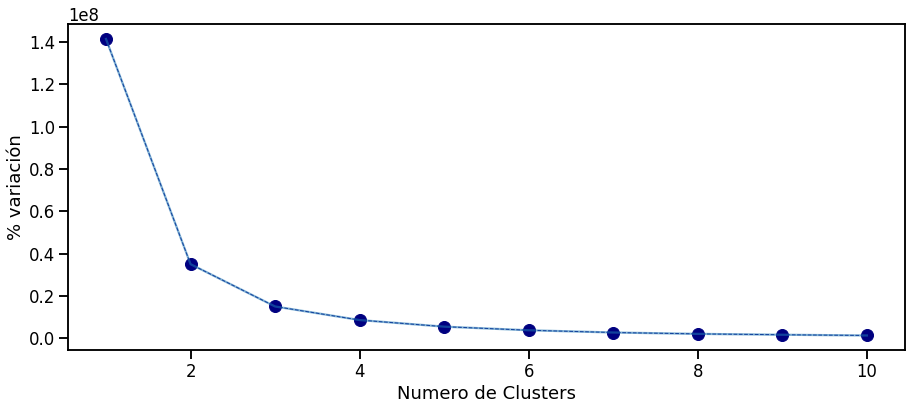

In [ ]:
plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11), ine_df, color='navy', marker='o', linestyle='dashed', linewidth=1, markersize=12)
plt.plot(np.arange(1, 11), ine_df, '-', alpha=0.55)
plt.xlabel('Numero de Clusters'), plt.ylabel('% variación')
plt.show()

In [ ]:
def imprimme_segmento(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

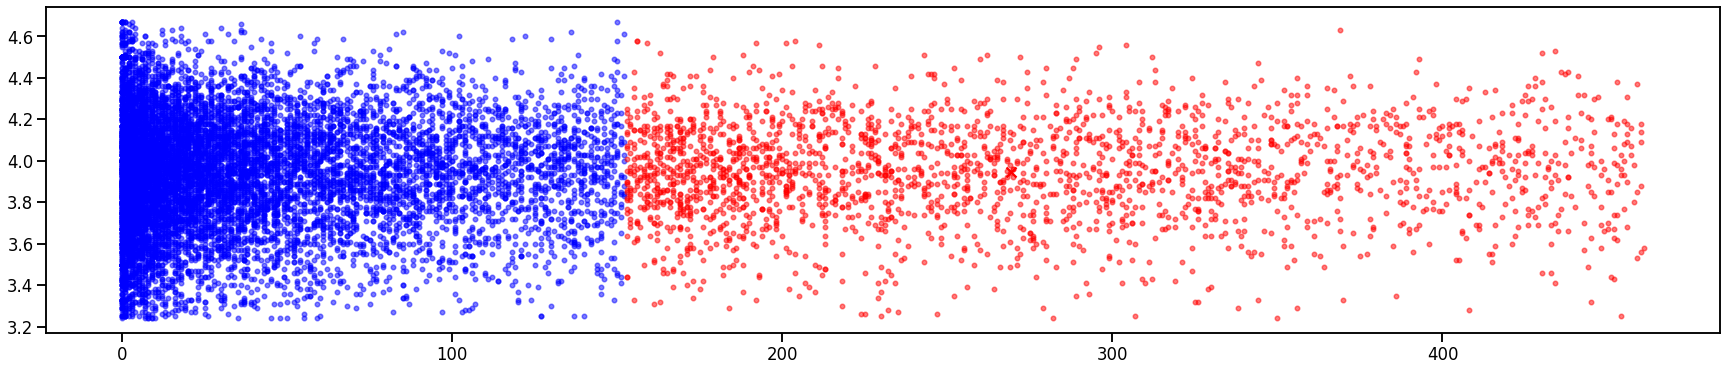

In [ ]:
plt.figure(1, figsize = (30 ,6))
imprimme_segmento(X1.values, kmn_df[1], 2)

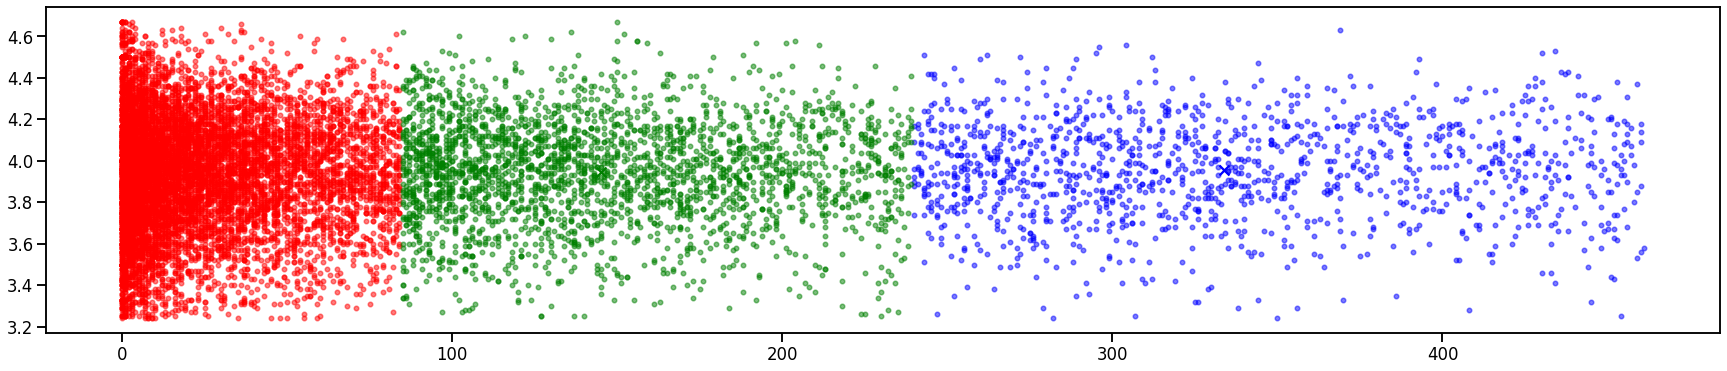

In [ ]:
plt.figure(1, figsize = (30 ,6))
imprimme_segmento(X1.values, kmn_df[2], 3)

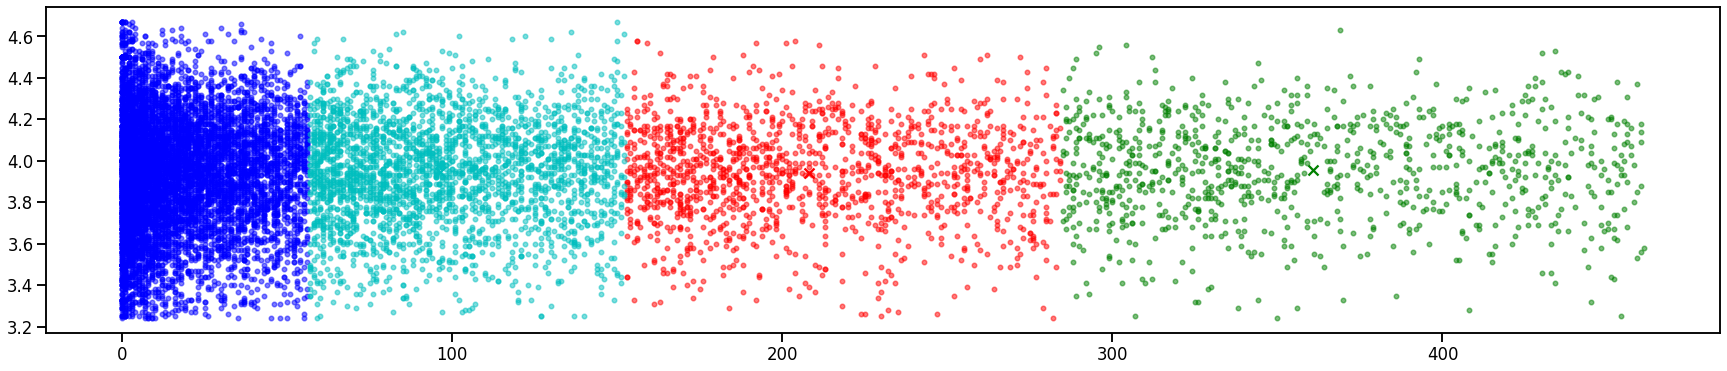

In [ ]:
plt.figure(1, figsize = (30 ,6))
imprimme_segmento(X1.values, kmn_df[3], 4)

In [ ]:
df[kmn_df[3].labels_ == 0]

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
1,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,3.79,152,1,2005
3,0618391002,The Lord of the Rings: Weapons and Warfare,Chris Smith,Houghton Mifflin Harcourt,4.53,218,45,2003
4,0618510826,The Lord of the Rings: Complete Visual Companion,Jude Fisher,Houghton Mifflin Harcourt,4.50,224,6,2004
6,1557344493,"Hatchet: A Guide for Using ""Hatchet"" in the Cl...",Donna Ickes,Teacher Created Resources,4.00,48,2,1994
8,1575606240,Molly Hatchet - 5 of the Best,Molly Hatchet,Cherry Lane Music Company,4.33,56,0,2003
...,...,...,...,...,...,...,...,...
13399,0140444963,The Thomas Paine Reader,Thomas Paine,Penguin Books,4.09,536,5,1987
13400,0809093448,Thomas Paine and the Promise of America (Oxfor...,Harvey J. Kaye,Hill and Wang,3.91,336,31,2006
13401,1593083769,Common Sense and Other Writings,Thomas Paine,Barnes Noble Classics,3.91,432,2,2005
13403,157453503X,Science Fiction: The Best of 2001,Robert Silverberg,Fantastic Audio,3.48,0,0,2002


In [ ]:
df[kmn_df[3].labels_ == 1]

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,4.42,352,244,2003
17,0374280398,Uncommon Carriers,John McPhee,Farrar Straus Giroux,3.95,248,203,2006
20,0374522871,Coming Into the Country,John McPhee,"Farrar, Straus and Giroux",4.22,448,262,1991
33,0441294677,"God Emperor of Dune (Dune Chronicles, #4)",Frank Herbert,Ace Books,3.85,423,167,1987
51,0679767479,The Untouchable,John Banville,Vintage Books,3.95,368,218,1998
...,...,...,...,...,...,...,...,...
13359,1860499333,The Gardens Of Kyoto,Kate Walbert,Virago,3.44,288,153,2002
13361,0385336748,Easter Island,Jennifer Vanderbes,Dial Press Trade Paperback,3.67,320,265,2004
13369,0395616239,The Island on Bird Street,Uri Orlev,HMH Books for Young Readers,3.76,176,154,1992
13380,1873982917,The Golem,Gustav Meyrink,Dedalus,3.88,264,174,2000


In [ ]:
df[kmn_df[3].labels_ == 2]

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
7,0385326505,Guts: The True Stories behind Hatchet and the ...,Gary Paulsen,Delacorte Press,3.88,144,336,2001
12,0141312629,The Changeling Sea,Patricia A. McKillip,Firebird,4.06,137,306,2003
19,0374522596,The Control of Nature,John McPhee,"Farrar, Straus and Giroux",4.24,288,305,1990
50,0140183957,Untouchable,Mulk Raj Anand,Penguin Books,3.72,160,286,1990
86,0345316509,Job: A Comedy of Justice,Robert A. Heinlein,Del Rey,3.78,439,440,1985
...,...,...,...,...,...,...,...,...
13362,0451456750,"Island in the Sea of Time (Nantucket, #1)",S.M. Stirling,Ace Books,4.01,608,390,1998
13365,0142300497,Island of the Aunts,Eva Ibbotson,Puffin Books,3.94,304,308,2001
13372,0385746407,The Little Island,Margaret Wise Brown,Doubleday Books for Young Readers,3.76,48,326,2003
13379,0395726182,Golem,David Wisniewski,Clarion Books,3.73,32,428,1996


In [ ]:
df[kmn_df[3].labels_ == 3]

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
2,0767910435,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,Broadway Books,3.88,256,131,2004
5,097669400X,Agile Web Development with Rails: A Pragmatic ...,Dave Thomas,Pragmatic Bookshelf,3.84,558,59,2005
11,0670059676,"Changeling (Changeling, #1)",Delia Sherman,Viking Juvenile,3.60,256,112,2006
13,0595321801,The Changeling,Zilpha Keatley Snyder,iUniverse,4.17,228,97,2004
15,0273704745,"Traders, Guns & Money: Knowns and Unknowns in ...",Satyajit Das,FT Press,3.83,334,83,2006
...,...,...,...,...,...,...,...,...
13371,0590482467,The Orphan of Ellis Island,Elvira Woodruff,Scholastic Paperbacks,3.84,192,94,2000
13374,0060748095,Love Story,Erich Segal,Harper Perennial,3.62,131,82,2005
13375,0425164403,Only Love,Erich Segal,Berkley,3.50,335,70,1998
13397,0452011019,Objectivism: The Philosophy of Ayn Rand,Leonard Peikoff,Plume,3.74,512,82,1993


## 3.2 Agrupación multivariada

In [ ]:
kmn_df = []
ine_df = []

# Clusters
for n in range(1 , 15):
    kmn_2 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111)
    kmn_2.fit(num_df)
    kmn_df.append(kmn_2)
    ine_df.append(kmn_2.inertia_)

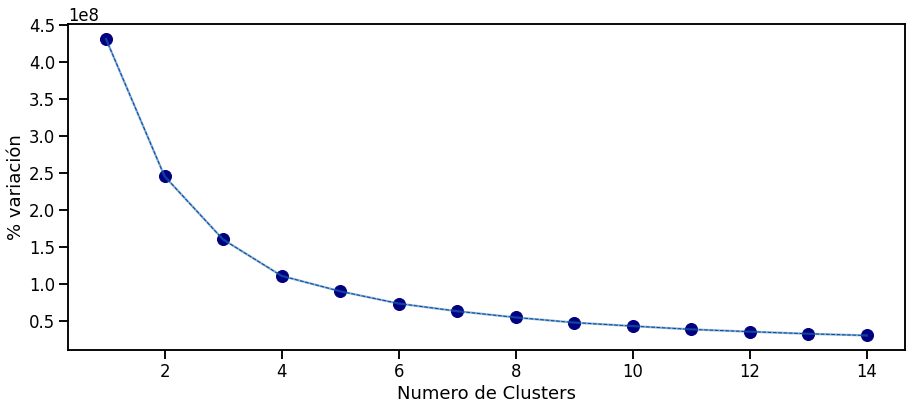

In [ ]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 15), ine_df, color='navy', marker='o', linestyle='dashed', linewidth=1, markersize=12)
plt.plot(np.arange(1, 15), ine_df, '-', alpha=0.55)
plt.xlabel('Numero de Clusters'), plt.ylabel('% variación')
plt.show()

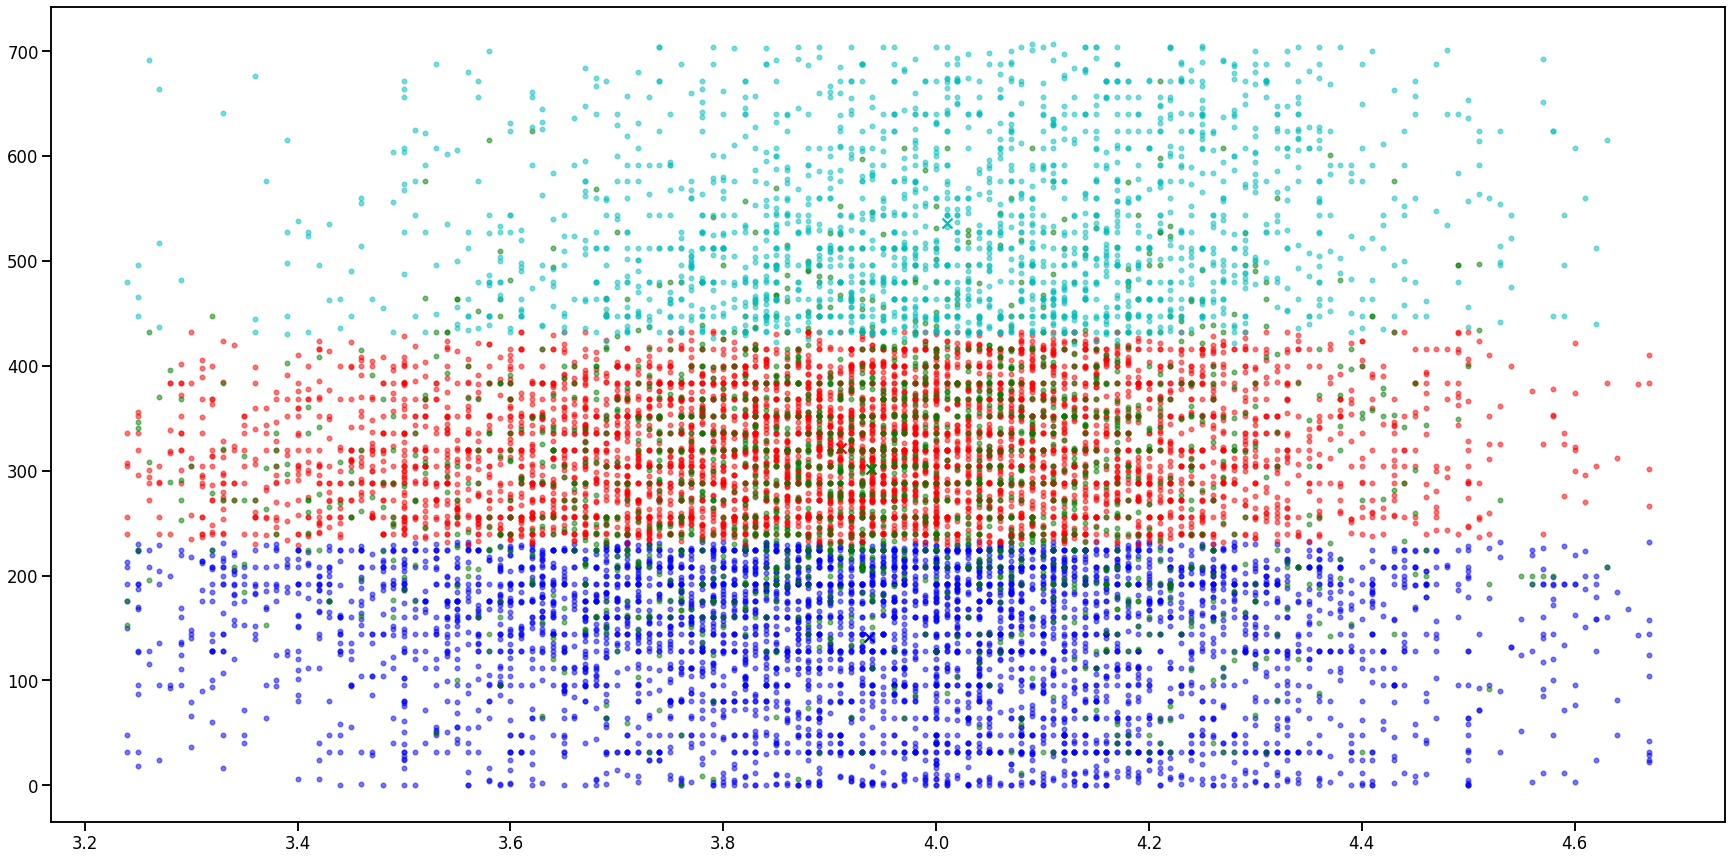

In [ ]:
plt.figure(1, figsize = (30 , 15))
imprimme_segmento(num_df.values, kmn_df[3], 4)

In [ ]:
df['Cluster'] = kmn_df[3].labels_

In [ ]:
df.sample(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
4779,0811213765,In Search of Duende,Federico García Lorca,New Directions,4.29,99,37,1998,0
10661,0755313089,Real Food - Fast,Mary Berry,Headline Home,3.82,224,0,2005,0
11813,0700606505,"The Confederacy's Last Hurrah: Spring Hill, Fr...",Wiley Sword,University Press of Kansas,4.31,528,18,1993,3


In [ ]:
df.to_csv('1.4_cluster_dataset.csv')